In [ ]:
# matplotlib 참고 사이트
# https://wikidocs.net/92088

In [1]:
import numpy as np
import pandas as pd

# EDA

In [2]:
infected = pd.read_csv('C:/Users/SHON/Desktop/KDT/프로젝트/프로젝트 데이터/서울시 코로나19 확진자 현황(자치구별)_서울열린데이터광장.csv', encoding = 'cp949')
infected.head(5)

,확진일,지역,여행력,접촉력,조치사항
0,2021-08-31,강남구,NaN,감염경로 조사중,NaN
1,2021-08-31,강남구,NaN,기타 확진자 접촉,NaN
2,2021-08-31,강남구,NaN,감염경로 조사중,NaN
3,2021-08-31,강남구,NaN,기타 확진자 접촉,NaN
4,2021-08-31,강남구,NaN,감염경로 조사중,NaN


In [3]:
# 순수하게 행정구 별 확진자만 집계하기 위해 다른 열은 삭제
infected.drop(['여행력','조치사항','접촉력'], axis = 'columns', inplace = True)
infected

,확진일,지역
0,2021-08-31,강남구
1,2021-08-31,강남구
2,2021-08-31,강남구
3,2021-08-31,강남구
4,2021-08-31,강남구
...,...,...
80015,2020-01-30,마포구
80016,2020-01-30,종로구
80017,2020-01-30,중랑구
80018,2020-01-24,강서구


In [4]:
infected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80020 entries, 0 to 80019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   확진일     80019 non-null  object
 1   지역      80020 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [5]:
# 결측치 확인
infected.isnull()

,확진일,지역
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
80015,False,False
80016,False,False
80017,False,False
80018,False,False


In [6]:
# 결측치 제거 후 데이터 갱신
infected = infected.dropna()

# 월별로 확진자 수 추출

In [7]:
# 2021년 월별로 추출
infected_2021_08 = infected[infected['확진일'].str.contains('2021-08')] # 확진일 컬럼에서 21년 n월 문자열이 포함된 것으로 추출한다.
district = infected_2021_08.groupby('지역') # 지역별로 그룹을 지정하기위해 groupby를 사용
district_08 = district.count() # 8월 데이터로 지칭
district_08.rename(columns = {'확진일':'8월'}, inplace = True)
district_08.drop(['기타','타시도'], axis = 'index', inplace = True) # 불필요 데이터 제거

In [8]:
infected_2021_07 = infected[infected['확진일'].str.contains('2021-07')]
district = infected_2021_07.groupby('지역')
district_07 = district.count()
district_07.rename(columns = {'확진일':'7월'}, inplace = True)
district_07.drop(['기타','타시도'], axis = 'index', inplace = True)

In [9]:
infected_2021_06 = infected[infected['확진일'].str.contains('2021-06')]
district = infected_2021_06.groupby('지역')
district_06 = district.count()
district_06.rename(columns = {'확진일':'6월'}, inplace = True)
district_06.drop(['기타','타시도'], axis = 'index', inplace = True)

In [10]:
infected_2021_05 = infected[infected['확진일'].str.contains('2021-05')]
district = infected_2021_05.groupby('지역')
district_05 = district.count()
district_05.rename(columns = {'확진일':'5월'}, inplace = True)
district_05.drop(['기타','타시도'], axis = 'index', inplace = True)

In [11]:
infected_2021_04 = infected[infected['확진일'].str.contains('2021-04')]
district = infected_2021_04.groupby('지역')
district_04 = district.count()
district_04.rename(columns = {'확진일':'4월'}, inplace = True)
district_04.drop(['기타','타시도'], axis = 'index', inplace = True)

In [12]:
infected_2021_03 = infected[infected['확진일'].str.contains('2021-03')]
district = infected_2021_03.groupby('지역')
district_03 = district.count()
district_03.rename(columns = {'확진일':'3월'}, inplace = True)
district_03.drop(['기타','타시도'], axis = 'index', inplace = True)

In [13]:
infected_2021_02 = infected[infected['확진일'].str.contains('2021-02')]
district = infected_2021_02.groupby('지역')
district_02 = district.count()
district_02.rename(columns = {'확진일':'2월'}, inplace = True)
district_02.drop(['기타','타시도'], axis = 'index', inplace = True)

In [14]:
infected_2021_01 = infected[infected['확진일'].str.contains('2021-01')]
district = infected_2021_01.groupby('지역')
district_01 = district.count()
district_01.rename(columns = {'확진일':'1월'}, inplace = True)
district_01.drop(['기타','타시도'], axis = 'index', inplace = True)

In [15]:
infected_2021 = pd.concat([district_01, district_02,district_03,district_04,district_05,district_06,district_07,district_08], axis = 1, join = 'inner')
infected_2021

,1월,2월,3월,4월,5월,6월,7월,8월
지역,,,,,,,,
강남구,227,118,240,428,529,792,1249,1288
강동구,179,161,252,253,314,284,523,457
강북구,174,124,125,133,266,164,348,333
강서구,215,96,133,217,189,213,576,651
관악구,162,182,129,313,226,268,1132,1001
광진구,120,155,253,238,215,236,468,532
구로구,181,237,126,142,183,160,568,629
금천구,72,69,26,84,146,103,334,375
노원구,216,186,211,259,354,239,575,403


In [16]:
# 행정구역 별 합계를 집게하여 새로운 열로 추가
infected_2021['총 확진자 수'] = infected_2021.sum(axis = 'columns')
infected_2021['총 확진자 수'] = infected_2021['총 확진자 수'].astype(int)
infected_2021

,1월,2월,3월,4월,5월,6월,7월,8월,총 확진자 수
지역,,,,,,,,,
강남구,227,118,240,428,529,792,1249,1288,4871
강동구,179,161,252,253,314,284,523,457,2423
강북구,174,124,125,133,266,164,348,333,1667
강서구,215,96,133,217,189,213,576,651,2290
관악구,162,182,129,313,226,268,1132,1001,3413
광진구,120,155,253,238,215,236,468,532,2217
구로구,181,237,126,142,183,160,568,629,2226
금천구,72,69,26,84,146,103,334,375,1209
노원구,216,186,211,259,354,239,575,403,2443


In [17]:
infected_2021.to_csv('C:/Users/SHON/Desktop/KDT/프로젝트/프로젝트 데이터/행정구별 확진자 수.csv')

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')

df = pd.read_csv('C:/Users/SHON/Desktop/KDT/프로젝트/프로젝트 데이터/전처리 후/행정구별 확진자 수.csv',index_col = 0, encoding = 'cp949')

In [19]:
df.drop('총 확진자 수', axis = 'columns', inplace = True)
df

,1월,2월,3월,4월,5월,6월,7월,8월
행정구,,,,,,,,
강남구,227,118,240,428,529,792,1249,1288
강동구,179,161,252,253,314,284,523,457
강북구,174,124,125,133,266,164,348,333
강서구,215,96,133,217,189,213,576,651
관악구,162,182,129,313,226,268,1132,1001
광진구,120,155,253,238,215,236,468,532
구로구,181,237,126,142,183,160,568,629
금천구,72,69,26,84,146,103,334,375
노원구,216,186,211,259,354,239,575,403


In [20]:
df = df.transpose()

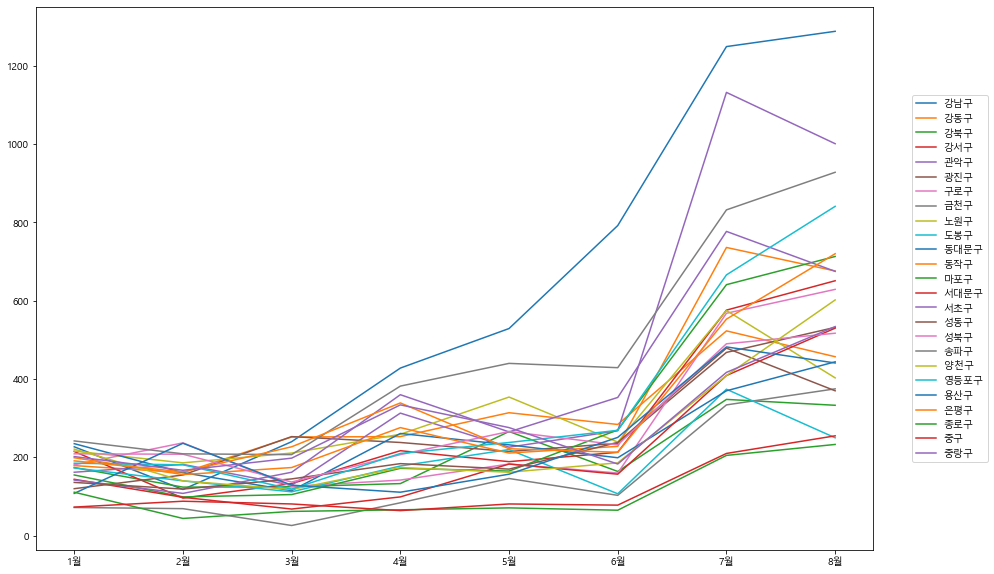

In [27]:
df.plot(figsize = (15, 10))
plt.legend(loc = 'center left', bbox_to_anchor = (1.04, 0.5))

In [22]:
top_10 = infected_2021.sort_values(ascending = False, by = '총 확진자 수').head(10)
top_10 = top_10.drop('총 확진자 수', axis = 'columns')

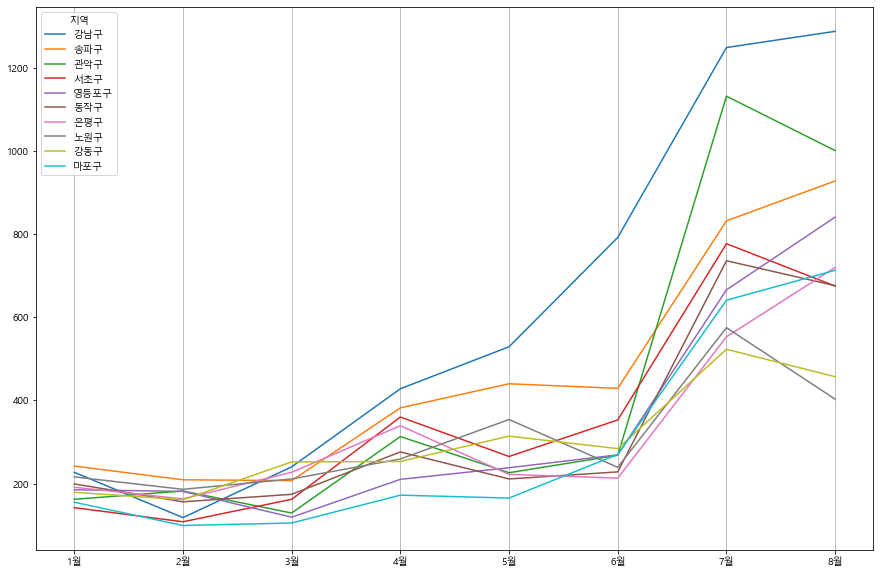

In [28]:
# 모든 행정구를 표시했을 때 겹쳐보여서 식별이 어려운 문제점으로 누적 확진자 상위 10개의 구만 추린 후 시각화
# 수도권 거리두기 4단계 상향일자는 7월 12일
# 6월부터 확진자 수가 폭증한 후 4단계 도입 후 소폭 꺾인 상태
top_10.transpose().plot(figsize = [15, 10])
plt.grid(True, axis = 'x')

<AxesSubplot:title={'center':'확진자 수 상위 10개 지역의 비율'}, ylabel='총 확진자 수'>

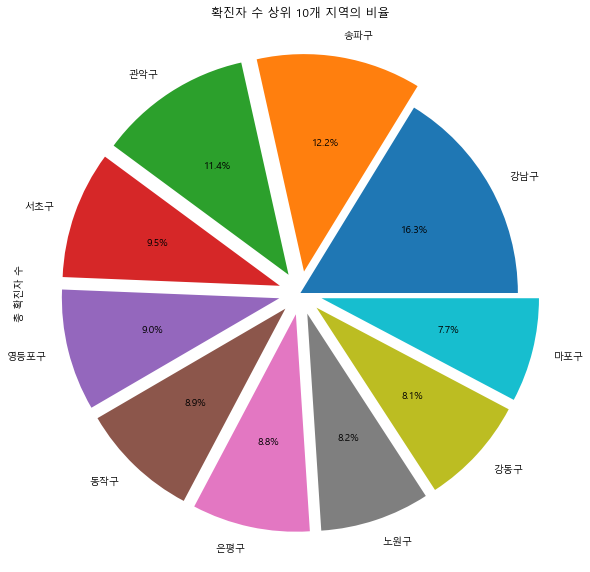

In [34]:
plt.title('확진자 수 상위 10개 지역의 비율')
infected_2021['총 확진자 수'].sort_values(ascending = False).head(10).plot(kind = 'pie',autopct = '%1.1f%%', explode = [0, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], figsize = [10, 10])